# Financial Crisis Data and Drawing on a Subplot

The dataset contains closing S&P 500 Index price since 2007 obtained from Yahoo! Finance.  
  
The visual is from Chapter 9 of "Python for Data Analysis' by Wes McKinney.  
  
Dataset: https://github.com/wesm/pydata-book/tree/2nd-edition/examples

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import randn
import pandas as pd
from datetime import datetime
plt.rc('figure', figsize=(10, 6))

In [23]:
data = pd.read_csv('spx.csv', index_col=0, parse_dates=True) 
data.head()

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


In [15]:
#spx is a Series object
spx = data['SPX']

spx.head()

1990-02-01    328.79
1990-02-02    330.92
1990-02-05    331.85
1990-02-06    329.66
1990-02-07    333.75
Name: SPX, dtype: float64

In [16]:
dtime = datetime(1990, 2, 1)
spx.asof(dtime)

328.79

In [17]:
dict(facecolor='black', headwidth=4, width=2, headlength=4)

{'facecolor': 'black', 'headwidth': 4, 'width': 2, 'headlength': 4}

## Basic Annotation

the *annotate()* method provides helper functionality to make annotations easy.  
  
In an annotation, there are two points to consider: 
- the **location being annotated** represented by the argument ***xy*** 
- and the **location of the text *xytext***.  
  
Both of these arguments are (x,y) tuples.

https://matplotlib.org/stable/tutorials/text/annotations.html

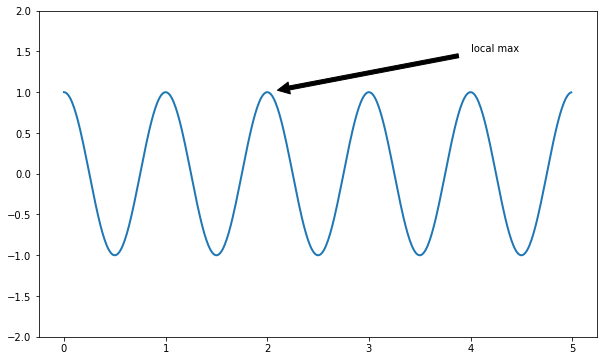

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2*np.pi*t)
line, = ax.plot(t, s, lw=2) #lw - line width

ax.annotate('local max', 
            xy=(2, 1), xytext=(4, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2)
plt.show()

# ax.annotate?
# ax.plot?

## 2007 Financial Crisis Visual

<AxesSubplot:>

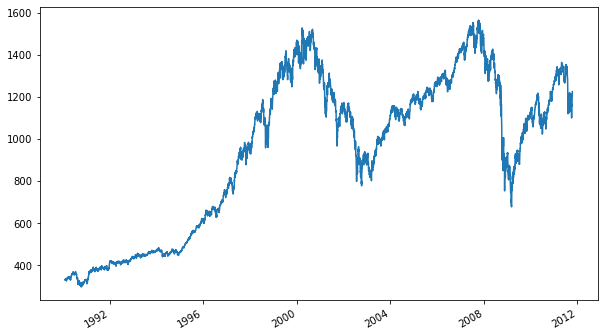

In [19]:
spx.plot()

### Same visual, this time with annotations:

Text(0.5, 1.0, 'Dates in the 2008-2009 financial crisis')

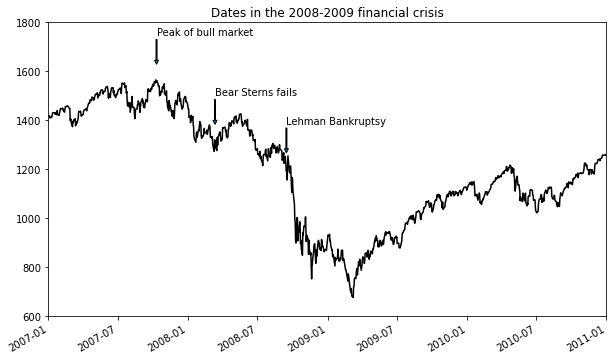

In [25]:
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1)

spx.plot(ax=ax, style='k-')


#bull market - a market in which share prices are rising, encouraging buying.
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Sterns fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptsy')]

for (date, label) in crisis_data:
    ax.annotate(label, 
                xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(headwidth=4, width=1, headlength=4),
                horizontalalignment='left', verticalalignment='top')

    
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
ax.set_ylim([600, 1800])

ax.set_title('Dates in the 2008-2009 financial crisis')

# fig.savefig('FinancialCrisis.jpg')

Read more about Lehman collapse: https://www.thestreet.com/markets/lehman-brothers-collapse-14703153

OPTIONAL  
MatPlotLib Transformations tutorial: https://matplotlib.org/stable/tutorials/advanced/transforms_tutorial.html
  
Figure size in different units:
https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/figure_size_units.html